In [1]:
from helper.dataset_reader import read_tsv
from comlid_crf import *

In [2]:
langid = LanguageIdentifier()

## Experiment 1

Using train_test_split

In [3]:
data = read_tsv('../dataset/all-merged-data-140422.tsv')


 Evaluation on the test data
Confusion Matrix
              precision    recall  f1-score   support

          ID       0.95      0.97      0.96     10416
          JV       0.91      0.89      0.90      2308
          EN       0.93      0.92      0.92      2304
           O       0.97      0.93      0.95      4685
   MIX-ID-EN       0.97      0.89      0.93       453
   MIX-ID-JV       0.93      0.89      0.91       142
   MIX-JV-EN       0.94      0.87      0.90       114

    accuracy                           0.95     20422
   macro avg       0.94      0.91      0.93     20422
weighted avg       0.95      0.95      0.95     20422



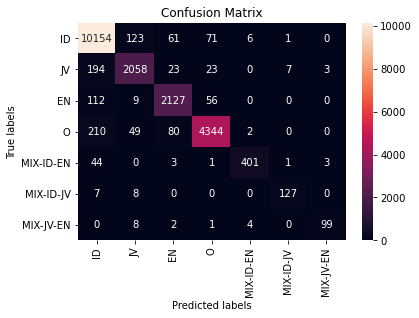


 Evaluation on the training data
Confusion Matrix
              precision    recall  f1-score   support

          ID       1.00      1.00      1.00     57321
          JV       0.99      0.99      0.99     12300
          EN       1.00      1.00      1.00     13765
           O       1.00      1.00      1.00     26014
   MIX-ID-EN       1.00      1.00      1.00      2519
   MIX-ID-JV       1.00      1.00      1.00       774
   MIX-JV-EN       0.99      0.99      0.99       674

    accuracy                           1.00    113367
   macro avg       1.00      1.00      1.00    113367
weighted avg       1.00      1.00      1.00    113367



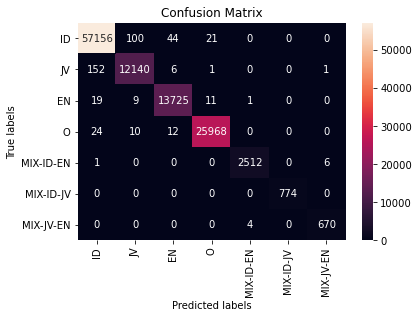


Top likely transitions:
O          -> O          2.29336
ID         -> O          1.15188
O          -> ID         1.14364
EN         -> O          1.08828
O          -> JV         1.08401
O          -> EN         1.07912
JV         -> O          1.07668
JV         -> JV         0.92376
EN         -> EN         0.76283
ID         -> ID         0.28373
O          -> MIX-ID-JV  0.13878
MIX-ID-JV  -> O          0.12579
MIX-ID-EN  -> O          0.02507
MIX-JV-EN  -> O          -0.01808
ID         -> EN         -0.02311
O          -> MIX-ID-EN  -0.03144
EN         -> ID         -0.08232
JV         -> MIX-JV-EN  -0.10017
JV         -> MIX-ID-JV  -0.15368
MIX-ID-JV  -> JV         -0.17093

Top unlikely transitions:
ID         -> MIX-ID-EN  -0.86042
MIX-ID-EN  -> EN         -0.99489
EN         -> MIX-JV-EN  -1.07110
EN         -> MIX-ID-EN  -1.11454
MIX-ID-JV  -> EN         -1.14450
ID         -> MIX-JV-EN  -1.23504
EN         -> MIX-ID-JV  -1.27667
MIX-JV-EN  -> EN         -1.30984
MIX-JV-EN

In [13]:
langid.pipeline_merge(data, test_size=0.15, model_name='model_merge_8_2.pkl')


 Evaluation on the test data
Confusion Matrix
              precision    recall  f1-score   support

          ID       0.94      0.98      0.96     22317
          JV       0.91      0.89      0.90      4915
          EN       0.93      0.92      0.92      5005
           O       0.97      0.92      0.94     10161
   MIX-ID-EN       0.96      0.89      0.93       976
   MIX-ID-JV       0.95      0.88      0.91       289
   MIX-JV-EN       0.94      0.85      0.89       274

    accuracy                           0.94     43937
   macro avg       0.94      0.90      0.92     43937
weighted avg       0.94      0.94      0.94     43937



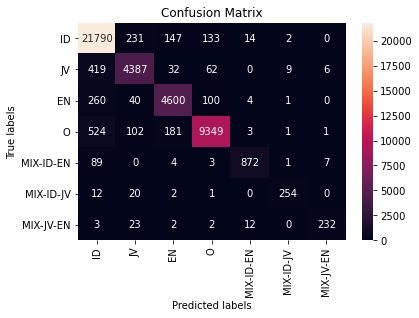


 Evaluation on the training data
Confusion Matrix
              precision    recall  f1-score   support

          ID       1.00      1.00      1.00     45420
          JV       0.99      0.99      0.99      9693
          EN       1.00      1.00      1.00     11064
           O       1.00      1.00      1.00     20538
   MIX-ID-EN       1.00      1.00      1.00      1996
   MIX-ID-JV       1.00      1.00      1.00       627
   MIX-JV-EN       0.98      0.99      0.99       514

    accuracy                           1.00     89852
   macro avg       1.00      1.00      1.00     89852
weighted avg       1.00      1.00      1.00     89852



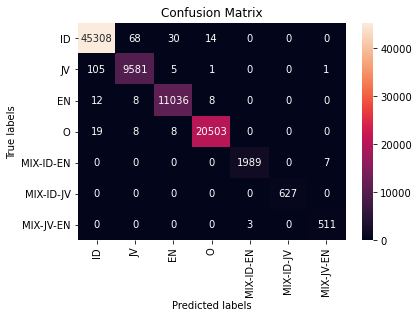


Top likely transitions:
O          -> O          1.55508
JV         -> JV         0.94161
JV         -> O          0.92101
O          -> ID         0.89370
O          -> JV         0.81412
EN         -> O          0.80124
ID         -> O          0.78660
O          -> EN         0.67509
EN         -> EN         0.59477
ID         -> ID         0.23118
JV         -> MIX-JV-EN  -0.01519
MIX-ID-EN  -> O          -0.05583
O          -> MIX-ID-EN  -0.08041
MIX-JV-EN  -> O          -0.08688
ID         -> EN         -0.13861
MIX-ID-JV  -> O          -0.14933
MIX-JV-EN  -> JV         -0.15578
O          -> MIX-ID-JV  -0.15677
JV         -> MIX-ID-JV  -0.16877
MIX-ID-JV  -> JV         -0.18927

Top unlikely transitions:
ID         -> MIX-ID-JV  -0.84523
MIX-ID-JV  -> ID         -0.92785
MIX-ID-EN  -> EN         -0.93549
MIX-ID-JV  -> MIX-JV-EN  -0.99492
EN         -> MIX-JV-EN  -1.02146
MIX-ID-EN  -> MIX-ID-EN  -1.03223
MIX-JV-EN  -> MIX-JV-EN  -1.13624
MIX-ID-JV  -> EN         -1.15354
ID    

In [4]:
langid.pipeline_merge(data, test_size=0.33, model_name='model_merge.pkl')

In [5]:
import eli5
eli5.show_weights(langid.model, horizontal_layout=False)

## Experiment 2

Without train_test_split

In [6]:
train_data = read_tsv('../dataset/train-data-140422.tsv')
test_data = read_tsv('../dataset/test-data-140422.tsv')

In [7]:
# look at the data
test = langid.data_transformer(test_data)
X_test = [langid.sent2features(s) for s in test]

In [8]:
X_test[10]

[{'n_gram_0': '“',
  'token_BOS': True,
  'token_EOS': False,
  'prev_tag': '',
  'next_tag': 'ID',
  'prev_token': '',
  'next_token': 'Yakin',
  'token.lower': '“',
  'token.prefix_2': '“',
  'token.prefix_3': '“',
  'token.suffix_2': '“',
  'token.suffix_3': '“',
  'token.length': 1,
  'token.is_alpha': False,
  'token.is_numeric': False,
  'token.is_capital': False,
  'token.is_title': False,
  'token.startswith_symbols': False,
  'token.contains_numeric': False,
  'token.contains_capital': False,
  'token.contains_quotes': False,
  'token.contains_hyphen': False},
 {'n_gram_0': 'Yakin',
  'token_BOS': False,
  'token_EOS': False,
  'prev_tag': 'O',
  'next_tag': 'ID',
  'prev_token': '“',
  'next_token': 'laaah',
  'token.lower': 'yakin',
  'token.prefix_2': 'Ya',
  'token.prefix_3': 'Yak',
  'token.suffix_2': 'in',
  'token.suffix_3': 'kin',
  'token.length': 5,
  'token.is_alpha': True,
  'token.is_numeric': False,
  'token.is_capital': False,
  'token.is_title': True,
  'token.


 Evaluation on the test data
Confusion Matrix
              precision    recall  f1-score   support

          ID       0.93      0.97      0.95     11139
          JV       0.92      0.89      0.91      4906
          EN       0.87      0.93      0.90      1746
           O       0.96      0.93      0.94      5476
   MIX-ID-EN       0.93      0.83      0.88       578
   MIX-ID-JV       0.91      0.68      0.78       204
   MIX-JV-EN       0.94      0.51      0.66       258

    accuracy                           0.93     24307
   macro avg       0.92      0.82      0.86     24307
weighted avg       0.93      0.93      0.93     24307



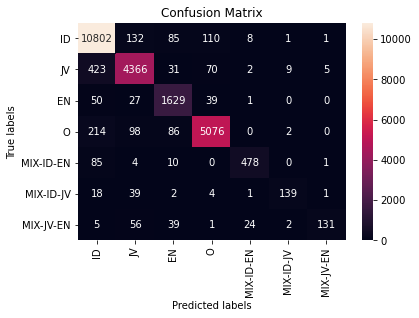


 Evaluation on the training data
Confusion Matrix
              precision    recall  f1-score   support

          ID       1.00      1.00      1.00     56598
          JV       0.99      0.98      0.99      9702
          EN       1.00      1.00      1.00     14323
           O       1.00      1.00      1.00     25223
   MIX-ID-EN       1.00      1.00      1.00      2394
   MIX-ID-JV       1.00      1.00      1.00       712
   MIX-JV-EN       0.99      1.00      0.99       530

    accuracy                           1.00    109482
   macro avg       1.00      1.00      1.00    109482
weighted avg       1.00      1.00      1.00    109482



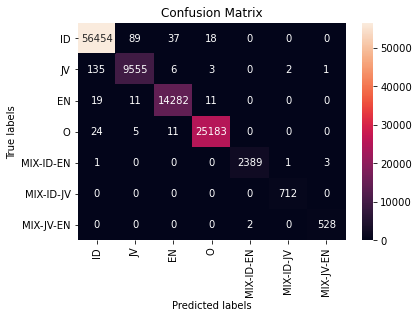


Top likely transitions:
O          -> O          1.42878
EN         -> O          1.05847
EN         -> EN         0.91841
ID         -> O          0.83793
JV         -> JV         0.82516
JV         -> O          0.79806
O          -> ID         0.75873
O          -> JV         0.73673
O          -> EN         0.66392
ID         -> ID         0.27141
EN         -> ID         0.10589
MIX-JV-EN  -> O          -0.01203
ID         -> EN         -0.05232
MIX-ID-JV  -> JV         -0.06488
MIX-ID-JV  -> O          -0.10102
EN         -> JV         -0.10673
MIX-ID-EN  -> O          -0.13790
MIX-JV-EN  -> JV         -0.17662
JV         -> EN         -0.18177
JV         -> MIX-ID-JV  -0.18277

Top unlikely transitions:
ID         -> MIX-ID-JV  -0.89673
EN         -> MIX-ID-EN  -0.90816
EN         -> MIX-JV-EN  -0.93427
ID         -> MIX-ID-EN  -0.96539
MIX-ID-JV  -> MIX-ID-JV  -1.00758
MIX-ID-JV  -> EN         -1.03431
MIX-JV-EN  -> EN         -1.10837
MIX-ID-JV  -> MIX-JV-EN  -1.20611
EN     

In [9]:
langid.pipeline_split(train_data, test_data, model_name='model_split.pkl')

In [10]:
import eli5
eli5.show_weights(langid.model, horizontal_layout=False)